In [ ]:
!pip install pillow
!pip install opencv-python
!pip install matplotlib

# **Lectura de Imagenes**

## *OpenCV*

*Lectura:*   
```cv2.imread('path_to_image')```
 carga una imagen desde el archivo especificado. Por defecto, la imagen se carga en formato BGR (azul, verde, rojo).   

*Almacenamiento en memoria:*   
En OpenCV, las imágenes se almacenan como arrays de Numpy. Esto facilita la manipulación de la imagen ya que Numpy ofrece una amplia gama de operaciones matemáticas.

## *PIL*
*Lectura:*  
```Image.open('path_to_image')``` abre y carga una imagen.

*Almacenamiento en memoria:*  
PIL utiliza su propio tipo de objeto, Image, para manejar las operaciones de imagen. Sin embargo, se puede convertir fácilmente en un array de Numpy para su manipulación

# **Conversión a Arrays de Numpy y Viceversa**

*OpenCV a Numpy*  
La imagen leída por OpenCV ya es un array de Numpy, por lo que no se requiere una conversión adicional.

*PIL a Numpy*
Conversión:  
```numpy.array(pil_image)``` convierte una imagen de PIL en un array de Numpy.

*Numpy a PIL*
Conversión:
```Image.fromarray(numpy_array)``` convierte un array de Numpy en una imagen de PIL.

# Guardar Imágenes a Disco

## Matplotlib
```matplotlib.pyplot.imsave('path_to_save', numpy_array) ``` guarda una imagen. Matplotlib puede guardar arrays de Numpy como imágenes.

## OpenCV
```cv2.imwrite('path_to_save', cv2_image)``` guarda una imagen en el disco.

## PIL
```pil_image.save('path_to_save')``` guarda una imagen en el disco.

# 
## 2.  Tomar dos fotos de una misma escena pero con diferentes iluminaciones.

### 1.) Construir en ambos casos los histogramas normalizados R,G,B (puede usar los 256 bines, u otra cantidad, por ejemplo 16 bines por cada canal de color).


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_histogram(image, title):
    plt.figure()
    for i, color in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(title)


In [ ]:
def histEq(I):
  Iflat = I.ravel()

  histogram_array = np.bincount(Iflat,minlength=256)

  #normalize
  num_pixeles = histogram_array.sum()
  histogram_array = histogram_array / num_pixeles

  # cumulative histogram
  chistogram_array = histogram_array.cumsum()
  transform_map = np.floor(255 * chistogram_array).astype(np.unit8)

  img_list = list(Iflat)

  eg_img_list = [transform_map[p] for p in img_list]

  Ieq = np.reshape(np.asarray(eg_img_list),I.shape)

  return Ieq


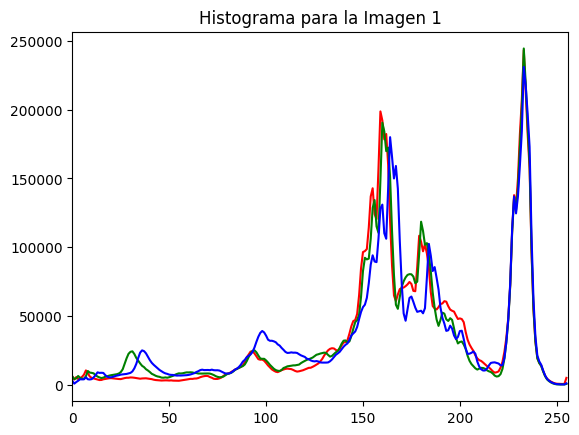

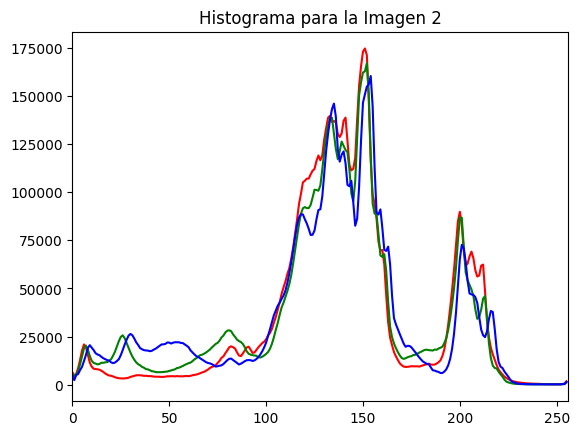

In [4]:


# Leer imágenes
image1 = cv2.imread('/content/conluz.jpg')
image2 = cv2.imread('/content/sinluz.jpg')

# Convertir de BGR a RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Plotear histogramas
plot_histogram(image1, 'Histograma para la Imagen 1')
plot_histogram(image2, 'Histograma para la Imagen 2')

plt.show()


### 1.) Proponer una Distancia para Comparar Histogramas

Estaremos usando el chi-cuadrado entre los histogramas

In [6]:
def compare_histograms(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

In [7]:


# Calcular histogramas para cada canal de color
hist_image1 = [cv2.calcHist([image1], [i], None, [256], [0, 256]) for i in range(3)]
hist_image2 = [cv2.calcHist([image2], [i], None, [256], [0, 256]) for i in range(3)]

# Comparar histogramas
distances = [compare_histograms(hist_image1[i], hist_image2[i]) for i in range(3)]
print("Distancias RGB: ", distances)


Distancias RGB:  [965320.8, 919460.94, 883679.1]
